# Introduction

This notebook is dedicated to the data processing of the laboratory rhizotron experiment. 
Two types of data are collected, an ERT dataset and a MALM. A classical ERT inversion is done while no inversion is required for the MALM as the potential value are analysed using a simple descriptive approach wich consist in plotting the gradient of the potential field * the conductivity of the medium.
This operation led to the identification of the direction and intensity of the current flux without having to invert the MALM data.

# Processing

### Import all the necessary packages
pybert is required in order to: 
- invert ERT data
- import TDIP data
- filter TDIP data

In [2]:
#!git clone https://gitlab.com/resistivity-net/bert
#!conda install -f pybert
#import pybert
#!conda install --yes --prefix {sys.prefix} pybert
!conda install --yes pybert

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gcass\anaconda3\envs\pygimli

  added / updated specs:
    - pybert


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1j             |       h8ffe710_0         5.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.8 MB

The following packages will be UPDATED:

  openssl                                 1.1.1i-h8ffe710_0 --> 1.1.1j-h8ffe710_0




openssl-1.1.1j       | 5.8 MB    |            |   0% 
openssl-1.1.1j       | 5.8 MB    |            |   0% 
openssl-1.1.1j       | 5.8 MB    | ###9       |  39% 
openssl-1.1.1j       | 5.8 MB    | ########## | 100% 
openssl-1.1.1j       | 5.8 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Ex

In [3]:
import os
import matplotlib.pyplot as plt

#!pip install resipy
import resipy

#!conda install -f pybert
#!conda install -c gimli pybert
import pybert as pb
from pybert import tdip


#import pygimli
import numpy as np

# My own library
from utils_rhizo import fct_utils as FU
#from run_ERT_invert_plant import invert_Resipy_ERT, invert_pygimli_ERT

API path =  E:\Padova\Software\InversionERT\resipy\src\resipy
ResIPy version =  3.2.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Define survey date (change date accordingly)

In [4]:
date = '0209' #  '1712' 0112 '1310' '1611' # (ddmm)

C:\Users\gcass\anaconda3\envs\pygimli\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Define file paths

In [5]:
main = os.getcwd()
os.chdir(main)
geomPath, meshPath, icsdPath, figpath = FU.definePath(main,date)
print(figpath)

./fig/0209/


### Define survey parameters
if invERT is set to FALSE, then waterRes needs to be defined according to the measured conductivity measured with the probe (in microS/cm)

(see excel file for correspondance dates/files/parameters)

In [6]:
invERT = False
waterRes = (1/855)*1e4 #21.23 # water resistivity (Ohm.m) converted from microS/cm 767, 477 
rec = True # reciprocal analysis
A = 72-1 # Id electrode A
B = 65-1 # Id electrode B
injection_duration = 2 # time of injection

Load ERT and MALM files 

(nothing to change providing all the raw file data respect the naming convention ERT_mmdd.bin (mm=month, dd=day))

In [9]:
# filename located in the raw data folder
# MALMIP_0122 MALMIP_0113 'MALMIP1217' 'MALMIP1201.bin' 'MALMIP1013' 'MALMIP1116.bin'
inputfileMALM = 'MALMIP_' + date + '.bin' #  
inputfileERT = 'ERT_' + date + '.bin' #

Filter data (no change needed in normal config)

In [7]:
rmvInvalid = False # True if you want to write filtered files/ False for raw data
rmv_outliers = False
rmv_id= None # remove an electrode from is id

split_Nfix = [True, 71-1]
Nfix = 71-1 #71-1  #None 71-1 # Id electrode N , put None if N is varying

Plot TDIP data options (no change needed)

In [8]:
plotCC = False # show Cole-Cole fitted parameters (to compare with literature)
all_gates= True
if not all_gates: 
    gateIP = 3 
else: gateIP = None # id extracted time window in mV/V (?)

### Run ERT inversion

Load geometry and mesh (fwd and inv) - (no change needed)

In [10]:
if invERT:
    RemLineNb, Injection, coordE, pointsE= FU.load_geom(geomPath) # geometry file containing electrodes position including remotes 
    mesh3d_fwd, sensors = FU.mesh_import(meshPath + 'BaseRhizo_Vrte.msh')
    mesh3d_inv, sensors = FU.mesh_import(meshPath + 'BaseRhizo_Vrte_inv.msh')

Run with resipy code

In [ ]:
if invERT:
        inputfileERTcsv = 'ERT_' + date + '.csv'
    k = invert_Resipy_ERT(inputfileERTcsv)
    k.showResults()
    k.saveInvPlots(figpath + 'figs')

Run with pygimli code

In [ ]:
if invERT:
    model = invert_pygimli_ERT(inputfileERT,sensors,mesh3d_inv)
    pg.show(mesh3d_inv,data=model,notebook=True)
    mesh3d_inv.addData('model',model)
    mesh3d_inv.exportVTK('model' + date + '.vtk')
    
    plotter, _ = pg.show(mesh3d_inv, data=model,
                         alpha=0.9, hold=True, notebook=True)
    plotter.view_xy()
    #plotter.clim([20, 60])
    plotter.show()
    plotter.screenshot('model' + date + '.png')

### MALM processing

In [11]:
#%% Import data TDIP
IPcurves = tdip.TDIPdata('./raw_data/' + inputfileMALM) # e.g. ABEM or Syscal TXT export
valid = np.ones(len(IPcurves.data('m')))
IPcurves_f = tdip.TDIPdata('./raw_data/' + inputfileMALM)

22/02/21 - 12:15:57 - pyGIMLi - INFO - imported:  Data: Electrodes: 72 data: 300
22/02/21 - 12:15:57 - pyGIMLi - INFO - imported:  Data: Electrodes: 72 data: 300


300 (20, 300)
300 (20, 300)


In [12]:
if split_Nfix[0]:

    IPcurves.data('m').array()
    idn = np.where(IPcurves.data('m')==split_Nfix[1])[0]
    idm = np.where(IPcurves.data('n')==split_Nfix[1])[0]
    idfix = list(idn)  #+ list(idm)
    
    IPcurves.data('a')[idfix].array()
    IPcurves.data('b')[idfix].array()
    id_elec_2rmv = idfix # remove Nfix electrodes
    
    if Nfix is not None:
        a = set(list(range(0, len(IPcurves.data('m')))))
        id_elec_2rmv = a.difference(set(idfix))
        id_elec_2rmv = list(id_elec_2rmv)
    
    IPcurves_f, valid_split = FU.filterTDIP(IPcurves_f,id_elec_2rmv)

Remove outliers 

In [13]:
if rmv_outliers: 
    id_outliers = np.where(abs(IPcurves_f.data['M1'])>100)[0]
    id_elec_2rmv= list(id_outliers)
    if rmv_id: 
        id_elec_2rmv.append(rmv_id)
    IPcurves_f, valid_outliers = filterTDIP(IPcurves_f,id_elec_2rmv)

j=0
try:
    valid_split
except NameError:
    valid_split = np.ones(len(IPcurves.data('m')))
    
for i, v in enumerate(valid_split):
    if v==1: # if valid in split
        # check if valid in outliers
        if rmv_outliers:
            if valid_outliers[j] == 0:
                valid[i] = 0
                print(i)
            else:
                valid[i] = 1
            j = j + 1
    else: 
        valid[i] = 0    

Show decay

nr= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]


<AxesSubplot:xlabel='$t$ [s]', ylabel='$m_a$ [mV/V]'>

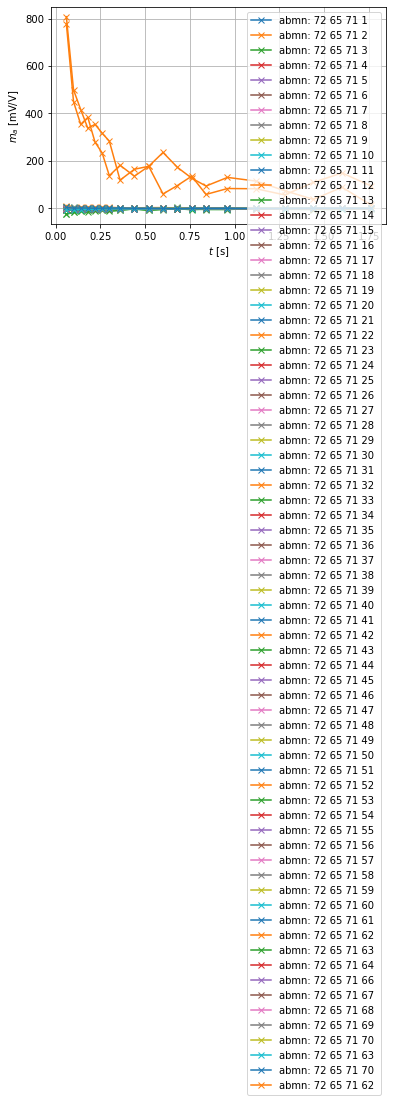

In [14]:
IPcurves_f.showDecay(nr=np.arange(0,len(IPcurves_f.data['a'])), showFit=False, 
                   yscale='linear',xscale='linear')

In [15]:
Obs_raw = pb.importer.importSyscalPro('./raw_data/' + inputfileMALM) 
Obs, dataABMN=  FU.PrepareMALMData('./raw_data/' + inputfileMALM, Rec=False, DevErr=1,
                           MinV=1, MaxRc=1, Kfact=1, MinMaxAppRes=1, 
                           SwE=False, 
                           valid=valid)
coordE_f = []
for i, mi in enumerate(Obs['m']):
    if mi==Nfix:
       mi=Obs['n'][i]
    id_coordE_f = np.where(mi+1==coordE[:,0])[0]
    #if len(id_coordE_f) > 1:
    coordE_f.append(coordE[id_coordE_f[0],:])
coordE_f = np.array(coordE_f)

C:\Users\gcass\anaconda3\envs\pygimli\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Data before filtering: Data: Electrodes: 72 data: 300
Data after filtering: Data: Electrodes: 72 data: 300
Data after valid: Data: Electrodes: 72 data: 72


NameError: name 'coordE' is not defined

Quiver plot= gradient(V)*conductivity

Results are saved in figs/date/ folder

In [ ]:
if Nfix is not None:

    FU.streamlines(coordE_f, Obs('r').array(), waterRes,
                   sensors=sensors, A=A, B=B, Nfix=Nfix,
                    vmin=-300, vmax=200)
    plt.savefig(figpath + 'streamlines_PV.png')

    fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
    for i, g in enumerate(range(1,20,5)):
        FU.streamlines(coordE_f, Obs('M'+str(g)).array(), waterRes,
                       sensors=sensors, A=A, B=B, Nfix=Nfix, ax=ax[i],
                       vmin=-10, vmax=10)
        ax[i].set_title('Gate t:' + str(IPcurves.t[g-1]) + 's')
        plt.tight_layout()
        plt.savefig(figpath + 'streamlines_transients.png')

    fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
    for i, g in enumerate(range(1,20,5)):
        FU.streamlines(coordE_f, Obs('M'+str(g)).array(), waterRes,
                       sensors=sensors, A=A, B=B, Nfix=Nfix, ax=ax[i]
                       )
        ax[i].set_title('Gate t:' + str(IPcurves.t[g-1]) + 's')
        plt.tight_layout()
        plt.savefig(figpath + 'streamlines_transients2.png')

This notebook is dedicated to the data processing of the laboratory rhizotron experiment. 
Two types of data are collected, ERT and MALM. A classical ERT inversion is followed by an extensive analysis of the MALM data. As for the MALM, no inversion is required as the potential value are analysed using a simple descriptive approach wich consist in plotting the gradient of the potential field * the conductivity of the medium. This operation led to the identification of the direction and intensity of the current flux without having to invert the MALM data.